In [1]:
import matplotlib 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl
import plotly.express as px

from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

In [5]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
wc = pd.read_csv('WorldCups.csv')

In [6]:
matches.drop_duplicates(inplace=True)

In [7]:
players.drop_duplicates(inplace=True)

In [8]:
matches.dropna(how='all',inplace=True)

In [10]:
null_percentage = players.isnull().sum() * 100 / len(players)
null_columns = null_percentage[null_percentage.values>45].index
null_columns

Index(['Position', 'Event'], dtype='object')

In [11]:
players.drop(null_columns, axis=1, inplace=True)

In [12]:
matches['MatchID'] = matches['MatchID'].astype(int)

In [13]:
matches["Datetime"] = pd.to_datetime(matches["Datetime"])

In [14]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [15]:
names.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'],
      dtype='object')

In [16]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [17]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [18]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [19]:
wrong = wrong + old
correct = correct + new

In [20]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'])

In [21]:
for index, wr in enumerate(wrong):
    wc = wc.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [22]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [23]:
matches.to_csv("matches.csv")

In [24]:
players.to_csv("players.csv")

In [25]:
wc.to_csv("wc.csv")

In [26]:
winner = wc['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

[Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

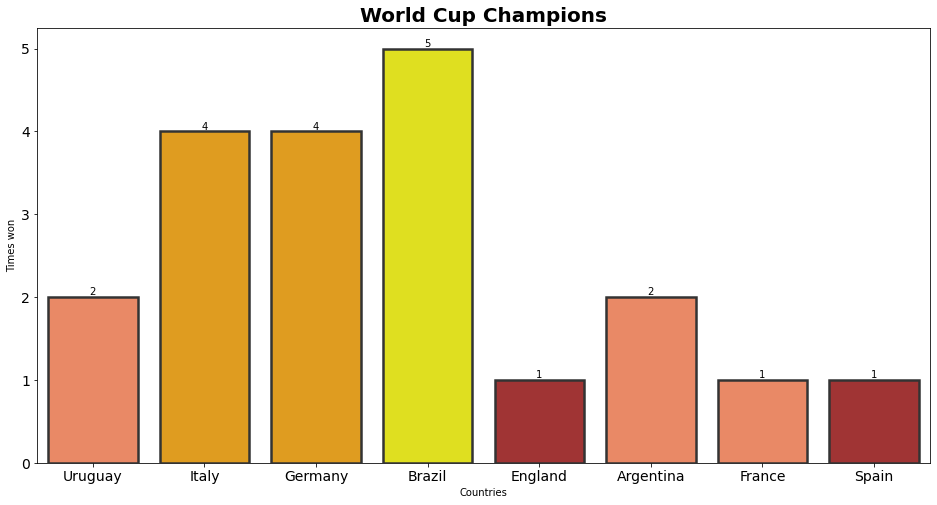

In [27]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Champions',size=20,weight='bold')
sns.countplot(x = wc['Winner'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.set_ylabel("Times won")
ax.set_xlabel("Countries")
plt.tick_params(labelleft=True, left=True,labelsize=14)
ax.bar_label(ax.containers[0])

In [28]:
runnerup = wc['Runners-Up'].value_counts()
runnerup

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

[Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

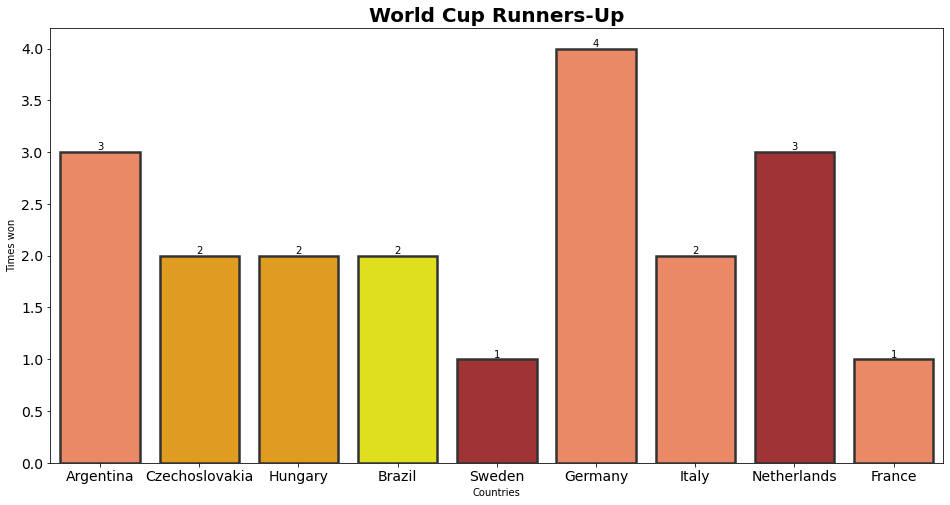

In [29]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Runners-Up',size=20,weight='bold')
sns.countplot(x = wc['Runners-Up'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.set_ylabel("Times won")
ax.set_xlabel("Countries")
plt.tick_params(labelleft=True, left=True,labelsize=14)
ax.bar_label(ax.containers[0])

In [33]:
third = wc['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

[Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

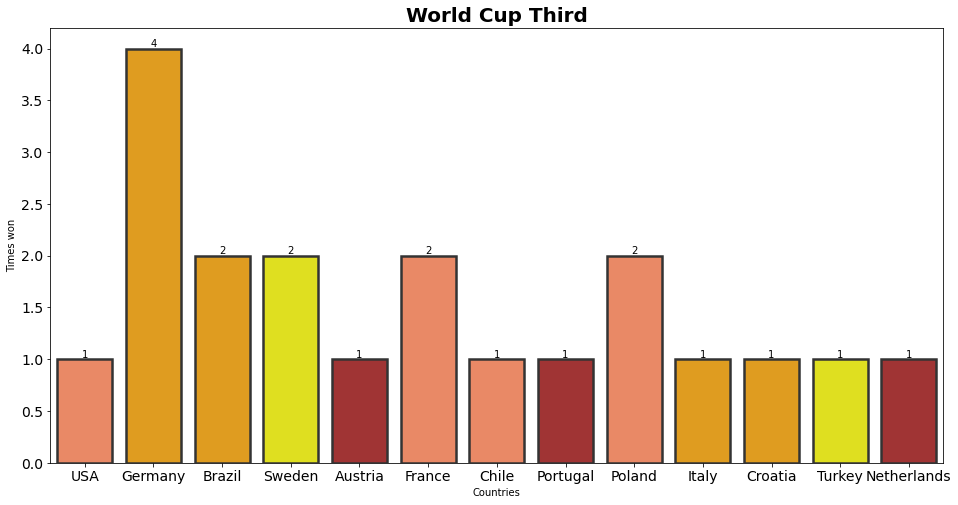

In [34]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Third',size=20,weight='bold')
sns.countplot(x = wc['Third'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.set_ylabel("Times won")
ax.set_xlabel("Countries")
plt.tick_params(labelleft=True, left=True,labelsize=14)
ax.bar_label(ax.containers[0])

In [35]:
top_3_teams = pd.concat([winner, runnerup, third], axis = 1)
top_3_teams.fillna(0, inplace = True)
top_3_teams = top_3_teams.astype(int)
top_3_teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [36]:
top_3_teams['Total'] = top_3_teams['Winner'] + top_3_teams['Runners-Up'] + top_3_teams['Third']
top_3_teams['Final'] = top_3_teams['Winner'] + top_3_teams['Runners-Up']

In [37]:
top_3_teams

,Winner,Runners-Up,Third,Total,Final
Brazil,5,2,2,9,7
Italy,4,2,1,7,6
Germany,4,4,4,12,8
Uruguay,2,0,0,2,2
Argentina,2,3,0,5,5
England,1,0,0,1,1
France,1,1,2,4,2
Spain,1,0,0,1,1
Netherlands,0,3,1,4,3
Czechoslovakia,0,2,0,2,2


In [38]:
top_3_teams.shape

(19, 5)

[Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

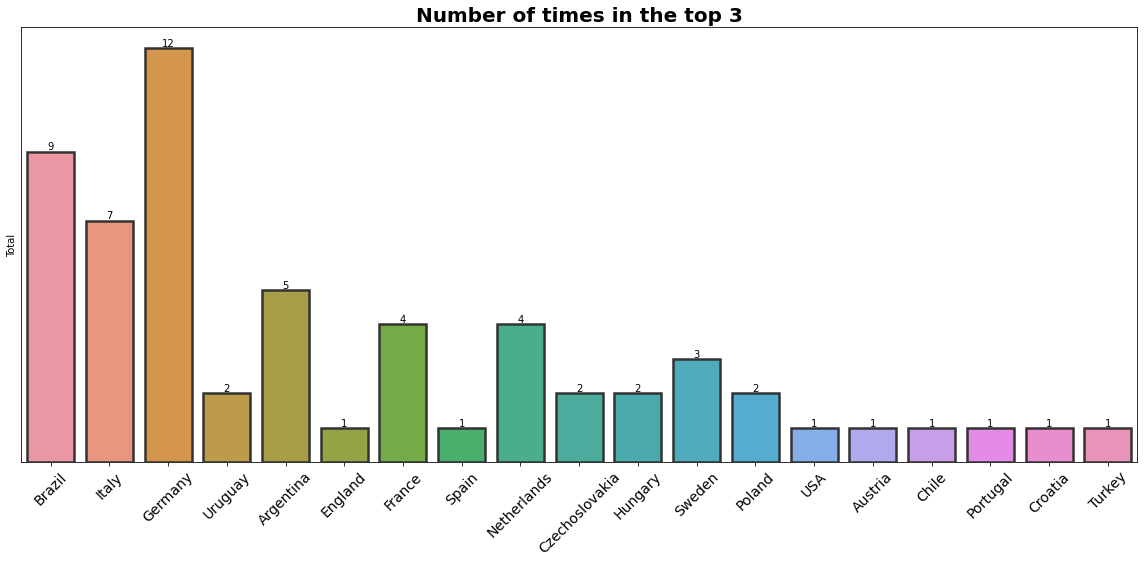

In [39]:
fig = plt.subplots(figsize=(20,8))
plt.title('Number of times in the top 3',size=20,weight='bold')

ax = sns.barplot(data = top_3_teams, x = top_3_teams.index, y = "Total", linewidth=2.5, edgecolor=".2")

plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

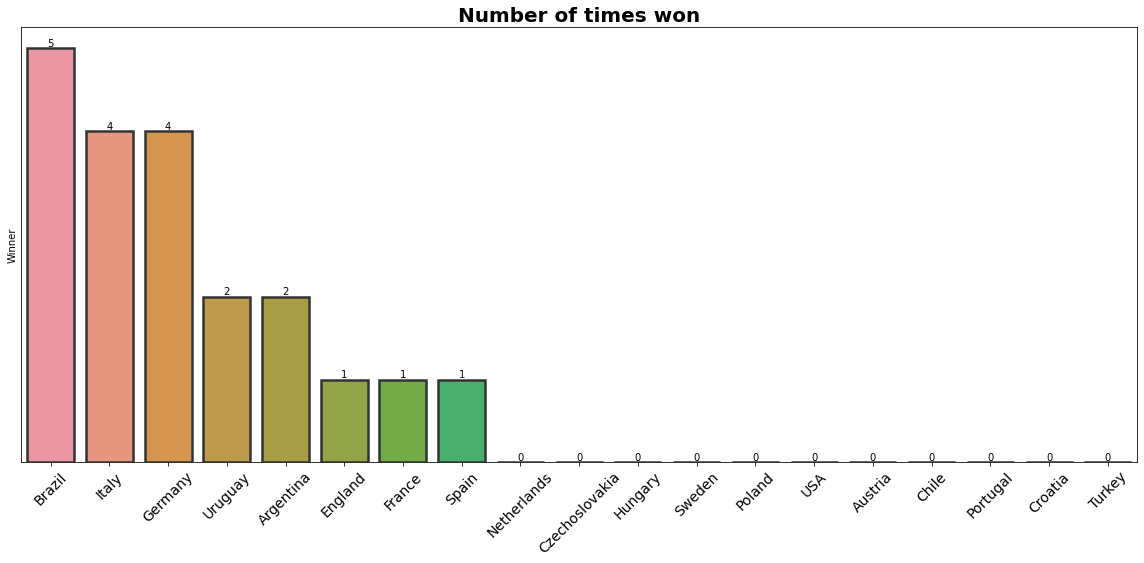

In [40]:
fig = plt.subplots(figsize=(20,8))
plt.title('Number of times won',size=20,weight='bold')

ax = sns.barplot(data = top_3_teams, x = top_3_teams.index, y = "Winner", linewidth=2.5, edgecolor=".2")

plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

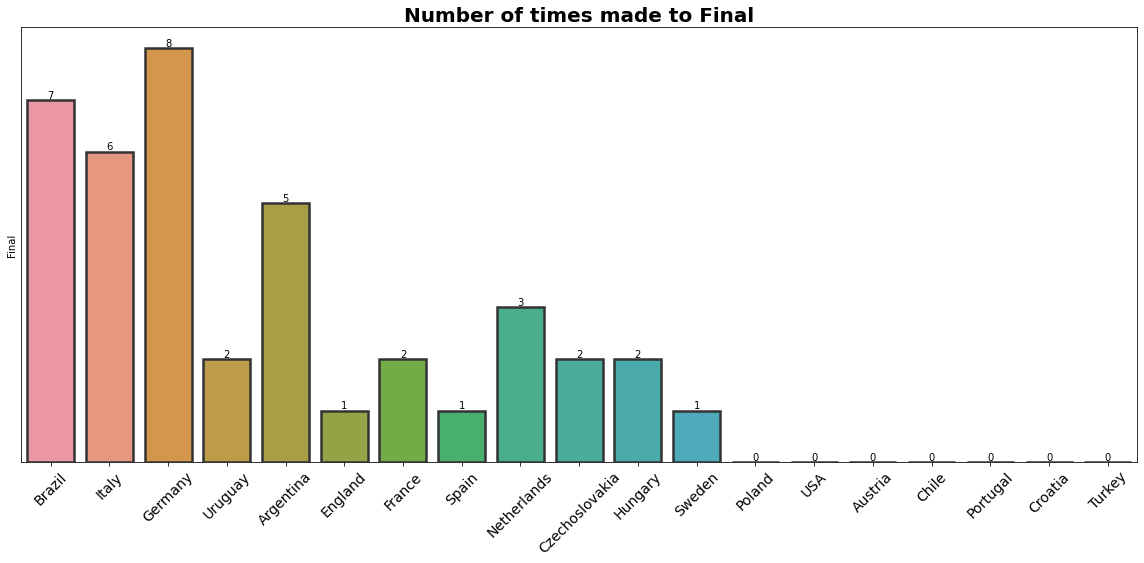

In [41]:
fig = plt.subplots(figsize=(20,8))
plt.title('Number of times made to Final',size=20,weight='bold')

ax = sns.barplot(data = top_3_teams, x = top_3_teams.index, y = "Final", linewidth=2.5, edgecolor=".2")

plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

In [42]:
top_3_teams.index = top_3_teams.index.astype(str)

In [43]:
top_3_teams = top_3_teams.reset_index(drop=False)

In [44]:
top_3_teams

,index,Winner,Runners-Up,Third,Total,Final
0,Brazil,5,2,2,9,7
1,Italy,4,2,1,7,6
2,Germany,4,4,4,12,8
3,Uruguay,2,0,0,2,2
4,Argentina,2,3,0,5,5
5,England,1,0,0,1,1
6,France,1,1,2,4,2
7,Spain,1,0,0,1,1
8,Netherlands,0,3,1,4,3
9,Czechoslovakia,0,2,0,2,2


In [45]:
top_3_teams.rename(columns={'index': 'Team'},inplace = True)

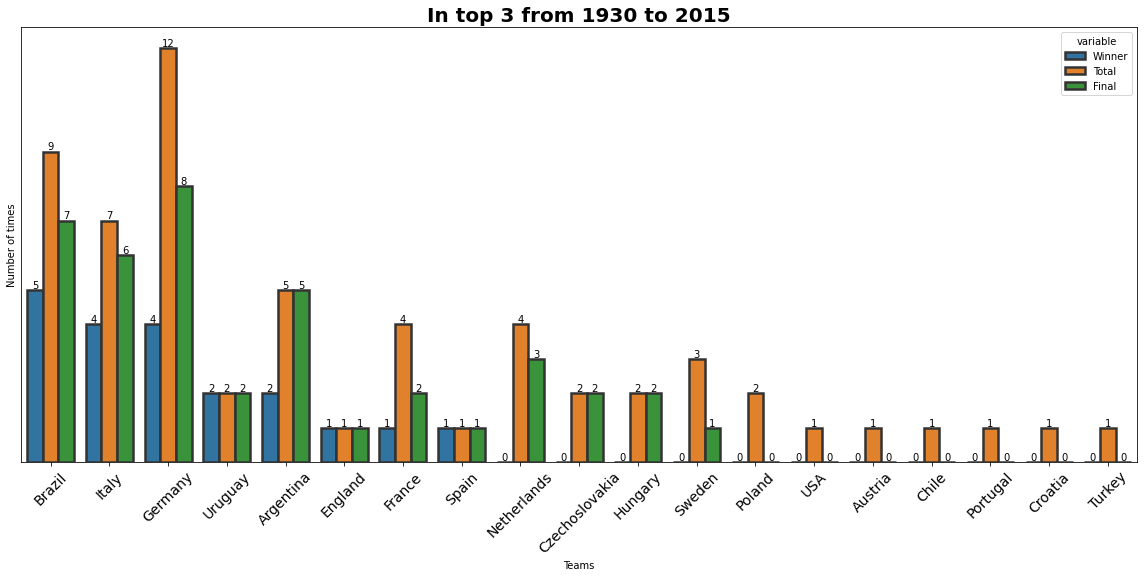

In [46]:
fig, ax = plt.subplots(figsize=(20,8))

plt.title('In top 3 from 1930 to 2015',size=20,weight='bold')

columns = ["Winner", "Total", "Final"]

plot_data = pd.melt(top_3_teams, id_vars='Team', value_vars=columns)

sns.barplot(x="Team", y="value", hue='variable', data=plot_data, linewidth=2.5, edgecolor=".2", ax=ax)

plt.tick_params(labelleft=False, left=False,labelsize=14)
ax.set_ylabel("Number of times")
ax.set_xlabel("Teams")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

In [50]:
matches["Winner_match"] = matches[["Home Team Goals","Away Team Goals"]].idxmax(axis=1)
matches["Winner_match"] = matches["Winner_match"].str.replace("Home Team Goals", 'First').str.replace("Away Team Goals", 'Second')

In [52]:
matches["Winner_half_time"] = matches[["Half-time Home Goals","Half-time Away Goals"]].idxmax(axis=1)
matches["Winner_half_time"] = matches["Winner_half_time"].str.replace("Half-time Home Goals", 'First').str.replace("Half-time Away Goals", 'Second')

In [53]:
matches["Win_half_time_win_all"] = matches["Winner_match"]==matches["Winner_half_time"]

In [54]:
matches["Win_half_time_win_all"].value_counts()

True     701
False    135
Name: Win_half_time_win_all, dtype: int64

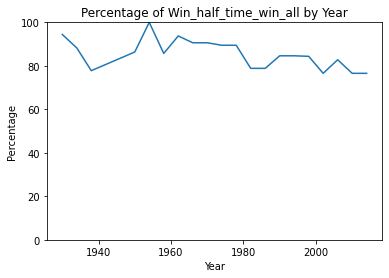

In [55]:
grouped = matches.groupby('Year')['Win_half_time_win_all'].mean() * 100
grouped = grouped.round(2)

# plot the percentage of true values for each year as a bar chart
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Win_half_time_win_all by Year')
plt.ylim([0, 100])
plt.show()

In [56]:
data = {
    'Country': ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile'],
    'Category': ['A', 'B', 'A', 'B', 'C', 'C'],
    'Value': [10, 20, 15, 25, 30, 35]
}

df = pd.DataFrame(data)

# create choropleth map
fig = px.choropleth(df, 
                    locations='Country',
                    locationmode='country names',
                    color='Category',
                    hover_name='Country',
                    projection='natural earth')

fig.show()

In [58]:
top_3_teams

,Team,Winner,Runners-Up,Third,Total,Final
0,Brazil,5,2,2,9,7
1,Italy,4,2,1,7,6
2,Germany,4,4,4,12,8
3,Uruguay,2,0,0,2,2
4,Argentina,2,3,0,5,5
5,England,1,0,0,1,1
6,France,1,1,2,4,2
7,Spain,1,0,0,1,1
8,Netherlands,0,3,1,4,3
9,Czechoslovakia,0,2,0,2,2


In [59]:
all_countries_list = np.unique(matches[['Home Team Name', 'Away Team Name']].values)
all_countries_df = pd.DataFrame(all_countries_list)
all_countries_df.rename(columns={0: 'Team'},inplace = True)

In [60]:
merged_df = pd.merge(top_3_teams, all_countries_df, on='Team', how='right')
merged_df.fillna(0, inplace=True)
merged_df

,Team,Winner,Runners-Up,Third,Total,Final
0,Algeria,0.0,0.0,0.0,0.0,0.0
1,Angola,0.0,0.0,0.0,0.0,0.0
2,Argentina,2.0,3.0,0.0,5.0,5.0
3,Australia,0.0,0.0,0.0,0.0,0.0
4,Austria,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
77,United Arab Emirates,0.0,0.0,0.0,0.0,0.0
78,Uruguay,2.0,0.0,0.0,2.0,2.0
79,Wales,0.0,0.0,0.0,0.0,0.0
80,Yugoslavia,0.0,0.0,0.0,0.0,0.0


In [61]:
merged_df["Highest"] = merged_df.apply(lambda row: 'Winner' if row['Winner'] > 0 
                        else ('Runners-Up' if row['Runners-Up'] > 0 
                                else ('Third' if row['Third'] > 0 else 'Qualified')), axis=1)

In [62]:
data = {
    'Country': ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile'],
    'Category': ['A', 'B', 'A', 'B', 'C', 'C'],
    'Value': [10, 20, 15, 25, 30, 35]
}

df = pd.DataFrame(data)

# create choropleth map
fig = px.choropleth(merged_df, 
                    locations='Team',
                    locationmode='country names',
                    color='Highest',
                    hover_name='Team',
                    projection='natural earth')

fig.show()

In [63]:
data = {
    'Country': ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile'],
    'Category': ['A', 'B', 'A', 'B', 'C', 'C'],
    'Value': [10, 20, 15, 25, 30, 35]
}

df = pd.DataFrame(data)

# create choropleth map
fig = px.choropleth(merged_df, 
                    locations='Team',
                    locationmode='country names',
                    color='Highest',
                    hover_name='Team',
                    projection='natural earth')

fig.show()

In [64]:
def pairplot_bivariate(df,list_values):
    pair = df[list_values].fillna(0)
    sns.pairplot(pair)
    plt.show()